# Adult Census Dataset

#### Problem Statement

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

Prediction

The prediction task is to determine whether a person makes over $50K a year.

### importing libraries¶

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
#printing first five records of the dataset

df.head(5)

,ID,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [5]:
df.tail()

,ID,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
32719,32719,56,Private,285730,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
32720,32720,36,Private,135289,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
32721,32721,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<=50K
32722,32722,55,Private,145214,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,4650,0,20,United-States,<=50K
32723,32723,46,Private,172581,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K


In [6]:
df.shape

(32724, 16)

#### Data cleaning

In [7]:
df.columns

Index(['ID', 'age', 'workclass', 'Final Weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'net-income'],
      dtype='object')

In [8]:
df.dtypes

ID                 int64
age                int64
workclass         object
Final Weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
net-income        object
dtype: object

In [9]:
#checking for duplicates

df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32724 entries, 0 to 32723
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              32724 non-null  int64 
 1   age             32724 non-null  int64 
 2   workclass       30829 non-null  object
 3   Final Weight    32724 non-null  int64 
 4   education       32724 non-null  object
 5   education-num   32724 non-null  int64 
 6   marital-status  32724 non-null  object
 7   occupation      30823 non-null  object
 8   relationship    32724 non-null  object
 9   race            32724 non-null  object
 10  gender          32724 non-null  object
 11  capital-gain    32724 non-null  int64 
 12  capital-loss    32724 non-null  int64 
 13  hours-per-week  32724 non-null  int64 
 14  native-country  32156 non-null  object
 15  net-income      32724 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


There are missing values in 'workclass', 'occupation','native-country'

In [11]:
df.nunique()

ID                32724
age                  73
workclass             8
Final Weight      21793
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
gender                2
capital-gain        121
capital-loss         95
hours-per-week       94
native-country       41
net-income            2
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,32724.0,16361.500000,9446.749441,0.0,8180.75,16361.5,24542.25,32723.0
age,32724.0,38.574257,13.712166,17.0,28.00,37.0,48.00,90.0
Final Weight,32724.0,189498.974392,105343.725701,13492.0,117528.00,177900.5,237006.25,1490400.0
education-num,32724.0,10.079941,2.568684,1.0,9.00,10.0,12.00,16.0
capital-gain,32724.0,1078.228792,7480.459910,0.0,0.00,0.0,0.00,99999.0
capital-loss,32724.0,87.700403,401.872849,0.0,0.00,0.0,0.00,4356.0
hours-per-week,32724.0,40.406216,12.454379,1.0,40.00,40.0,45.00,99.0


Here we can see age - min age is 17 and max age is 90, mean of age is 38, so our datagrouop is srpead into 17 to 90 years agegroup

edu-num - is like 1 to 16

#### find the missing % ratio

In [13]:

df_isna = df.isna().sum() *100/len(df)
df_isna = df_isna.round(2)
df_isna

ID                0.00
age               0.00
workclass         5.79
Final Weight      0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.81
relationship      0.00
race              0.00
gender            0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.74
net-income        0.00
dtype: float64

now fill the missing values with the mode of the repective values

In [14]:
null_columns = ['workclass','occupation','native-country']
for i in null_columns:
    df.fillna(df[i].mode()[0],inplace = True)

In [15]:
df.head()

,ID,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,Private,35724,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [16]:
df.isnull().sum()

ID                0
age               0
workclass         0
Final Weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
net-income        0
dtype: int64

#### Drop ID column

In [17]:
df.drop(['ID'],axis =1)

,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,75,Private,35724,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32719,56,Private,285730,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
32720,36,Private,135289,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
32721,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<=50K
32722,55,Private,145214,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,4650,0,20,United-States,<=50K


Hence, there are no null values are present in the dataset now

#### Value counts function

In [18]:
df['workclass'].value_counts()

Private             24683
Self-emp-not-inc     2566
Local-gov            2080
State-gov            1295
Self-emp-inc         1130
Federal-gov           949
Without-pay            15
Never-worked            6
Name: workclass, dtype: int64

In [19]:
df['occupation'].value_counts()

Prof-specialty       4125
Craft-repair         4096
Exec-managerial      4069
Adm-clerical         3819
Sales                3658
Other-service        3298
Machine-op-inspct    2048
Private              1901
Transport-moving     1570
Handlers-cleaners    1362
Farming-fishing      1023
Tech-support          930
Protective-serv       647
Priv-house-serv       168
Armed-Forces           10
Name: occupation, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States                 29379
Mexico                          616
Private                         568
Philippines                     201
Germany                         152
Canada                          125
Puerto-Rico                     121
India                           109
El-Salvador                      91
Cuba                             87
China                            82
England                          80
South                            80
Jamaica                          70
Italy                            67
Dominican-Republic               65
Poland                           64
Japan                            64
Columbia                         62
Guatemala                        62
Vietnam                          61
Haiti                            50
Portugal                         45
Taiwan                           43
Iran                             38
Nicaragua                        34
Ecuador                          34
Greece                      

In [21]:
df['race'].value_counts()

White                 27948
Black                  3170
Asian-Pac-Islander     1026
Amer-Indian-Eskimo      314
Other                   266
Name: race, dtype: int64

In [22]:
df['net-income'].value_counts()

<=50K    24928
>50K      7796
Name: net-income, dtype: int64

#### Rename the columns

In [23]:
df.rename(columns = {'fnlwgt':'final_weight','net-income':'income'},inplace = True)

#### Feature enginering


In [24]:
#Education category
df['education'].value_counts()

HS-grad         10615
Some-college     7263
Bachelors        5389
Masters          1794
Assoc-voc        1370
11th             1201
Assoc-acdm       1042
10th              945
7th-8th           637
Prof-school       559
9th               515
12th              444
Doctorate         401
5th-6th           342
1st-4th           158
Preschool          49
Name: education, dtype: int64

In [25]:
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('HS-grad','high school')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education = df.education.replace('Bachelors','undergrad')
df.education = df.education.replace('Masters','grad')
df.education = df.education.replace('Doctorate','doc')

In [26]:
df['education'].value_counts()

high school    10615
higher         10234
undergrad       5389
school          4291
grad            1794
doc              401
Name: education, dtype: int64

In [27]:
#Marital Status
df['marital-status'].value_counts()
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status'] = df['marital-status'].replace(['never-married'],'not-married')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'others')


In [28]:
#income
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [29]:
df.head()

,ID,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,60,Self-emp-not-inc,235535,high school,9,married,Exec-managerial,Husband,White,Male,0,0,48,United-States,0
1,1,28,Self-emp-not-inc,123983,higher,10,married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,0
2,2,71,Self-emp-not-inc,130436,school,2,others,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,0
3,3,75,Private,35724,high school,9,others,Private,Not-in-family,White,Female,0,0,8,United-States,0
4,4,50,Private,128143,undergrad,13,married,Craft-repair,Husband,White,Male,0,1887,50,United-States,1


<AxesSubplot:ylabel='income'>

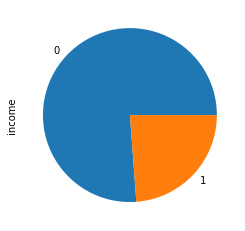

In [30]:
# Checking the Target variable
df['income'].value_counts().plot(kind ='pie')

Here , we can see that this dataset is imbalanced. Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class

In [31]:
#Find Categorical variables and Numerical variables
cat_var = df.select_dtypes(include=['object']).columns.tolist()
print(cat_var)



num_var = df.select_dtypes(exclude =['object']).columns.tolist()
print(num_var)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
['ID', 'age', 'Final Weight', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [32]:
df.head()

,ID,age,workclass,Final Weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,60,Self-emp-not-inc,235535,high school,9,married,Exec-managerial,Husband,White,Male,0,0,48,United-States,0
1,1,28,Self-emp-not-inc,123983,higher,10,married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,0
2,2,71,Self-emp-not-inc,130436,school,2,others,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,0
3,3,75,Private,35724,high school,9,others,Private,Not-in-family,White,Female,0,0,8,United-States,0
4,4,50,Private,128143,undergrad,13,married,Craft-repair,Husband,White,Male,0,1887,50,United-States,1


#### Unique values

In [33]:
df['capital-gain'].unique()

array([    0,  7298,  3464,  2176,  4416,  5013,  3273,  2829,  7430,
        7688,  2597, 15024,  6849,  2354,  4386,  4787,  2407,  2202,
        3325, 34095,  2907,  2174,  8614, 14344,  2635, 99999,  5178,
        3103,  4865,  4650,  2463,  2977,  2346,  9386, 14084,  6767,
       20051,  5556,   594,  5721,  4508,  1055,  3137, 10520,  1151,
        3432,  5455,  4064,  2964,  7262,  1409,   991,  3942,  2036,
       13550,  1506, 10566,  6514, 27828,  4934,  3674,  2580,  3781,
        4931,  3411,  1424,  1831,   114,  4101,  7443,  1639,  3908,
        6497,  2329,  2290,  2885,  6418,  1173,  3471,  1797, 25236,
        2961,  1848,   914,  3418,  6360,  9562,  2105,  1086,  3818,
       10605,  2050,  2538,  1455, 15020,  2993, 15831,  2653,  2414,
         401, 41310,  3456,  4687,  2062,  7896, 25124,  1111, 11678,
        3887,  1731,  7978,  6723,  2228, 18481,  2936,  6097,  5060,
        1264,  1471,  6612, 22040], dtype=int64)

In [34]:
df['capital-gain'].unique()

array([    0,  7298,  3464,  2176,  4416,  5013,  3273,  2829,  7430,
        7688,  2597, 15024,  6849,  2354,  4386,  4787,  2407,  2202,
        3325, 34095,  2907,  2174,  8614, 14344,  2635, 99999,  5178,
        3103,  4865,  4650,  2463,  2977,  2346,  9386, 14084,  6767,
       20051,  5556,   594,  5721,  4508,  1055,  3137, 10520,  1151,
        3432,  5455,  4064,  2964,  7262,  1409,   991,  3942,  2036,
       13550,  1506, 10566,  6514, 27828,  4934,  3674,  2580,  3781,
        4931,  3411,  1424,  1831,   114,  4101,  7443,  1639,  3908,
        6497,  2329,  2290,  2885,  6418,  1173,  3471,  1797, 25236,
        2961,  1848,   914,  3418,  6360,  9562,  2105,  1086,  3818,
       10605,  2050,  2538,  1455, 15020,  2993, 15831,  2653,  2414,
         401, 41310,  3456,  4687,  2062,  7896, 25124,  1111, 11678,
        3887,  1731,  7978,  6723,  2228, 18481,  2936,  6097,  5060,
        1264,  1471,  6612, 22040], dtype=int64)

In [35]:
df['education'].unique()

array(['high school', 'higher', 'school', 'undergrad', 'grad', 'doc'],
      dtype=object)

In [36]:
df['workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

### Data Visualization

In [37]:
corr = df.corr()
corr

,ID,age,Final Weight,education-num,capital-gain,capital-loss,hours-per-week,income
ID,1.000000,0.001828,0.003411,0.003876,-0.000365,-0.002041,-0.002855,0.005056
age,0.001828,1.000000,-0.076764,0.036327,0.079704,0.048540,0.073012,0.230686
Final Weight,0.003411,-0.076764,1.000000,-0.040412,-0.000839,-0.000021,-0.013981,-0.006556
education-num,0.003876,0.036327,-0.040412,1.000000,0.128545,0.076494,0.145734,0.336424
capital-gain,-0.000365,0.079704,-0.000839,0.128545,1.000000,-0.031456,0.080996,0.222351
capital-loss,-0.002041,0.048540,-0.000021,0.076494,-0.031456,1.000000,0.054916,0.150536
hours-per-week,-0.002855,0.073012,-0.013981,0.145734,0.080996,0.054916,1.000000,0.229769
income,0.005056,0.230686,-0.006556,0.336424,0.222351,0.150536,0.229769,1.000000


#### HeatMap

<AxesSubplot:>

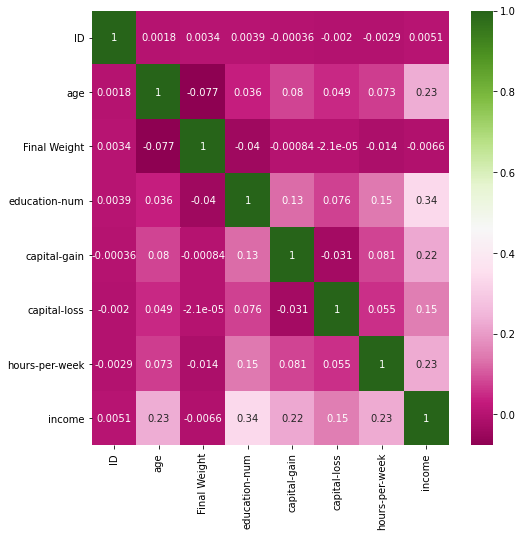

In [38]:
plt.figure(figsize = (8,8))
colors = ["#05ff1e", '#ff0000']
sns.heatmap(corr, annot = True, cmap = "PiYG")

#### income is target variable

#### Histogram

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Final Weight'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

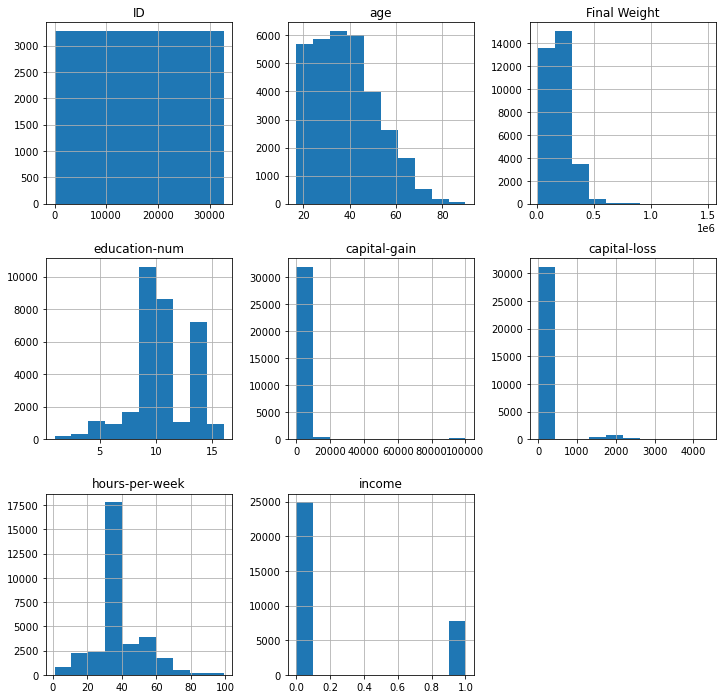

In [39]:
df.hist(figsize=(12,12),layout=(3,3))

#### Boxplot

ID                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
age               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Final Weight      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
education-num        AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-gain      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
hours-per-week          AxesSubplot(0.125,0.125;0.227941x0.222059)
income               AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

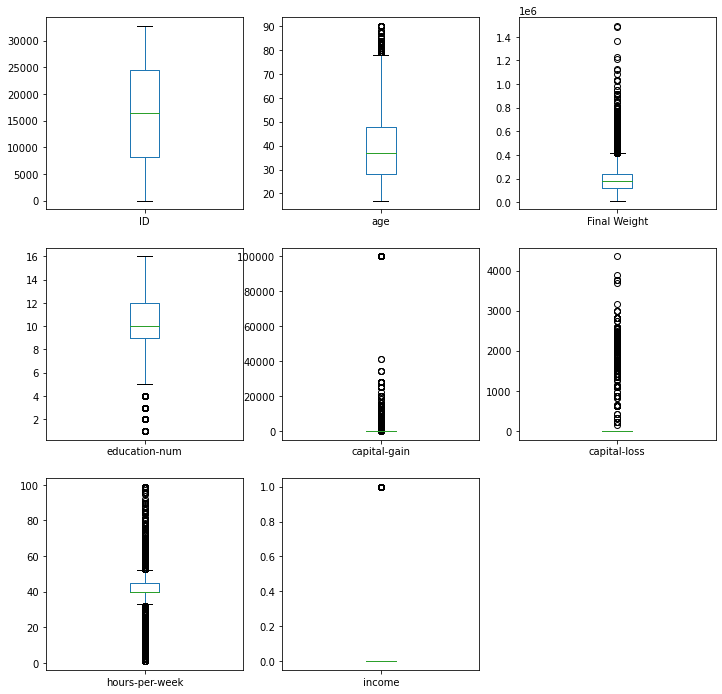

In [40]:
df.plot(kind ='box',figsize=(12,12),layout=(3,3),subplots=True)

#### Countplot

<AxesSubplot:xlabel='income', ylabel='count'>

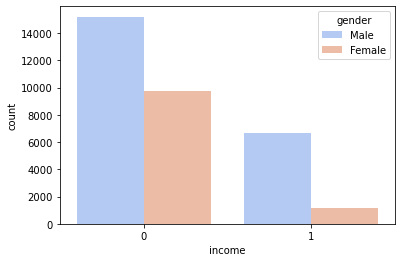

In [41]:
sns.countplot(df['income'],palette ='coolwarm', hue='gender',data=df)

Here in less than 50k male's income is around 15000 n female income is around 9000 greater than 50k male's income is around 7000 and female income is around 1500 the lowest

<AxesSubplot:xlabel='income', ylabel='count'>

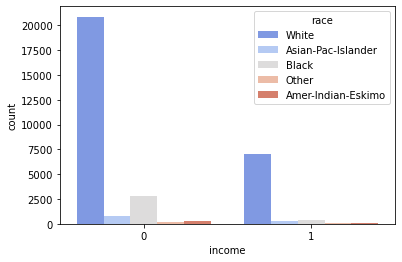

In [42]:
sns.countplot(df['income'],palette ='coolwarm', hue='race',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

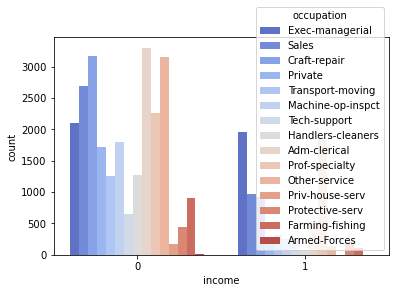

In [43]:
sns.countplot(df['income'],palette ='coolwarm', hue='occupation',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

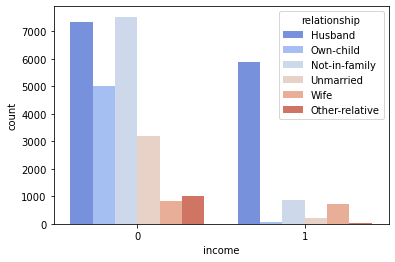

In [44]:
sns.countplot(df['income'],palette ='coolwarm', hue='relationship',data=df)

<AxesSubplot:xlabel='count', ylabel='workclass'>

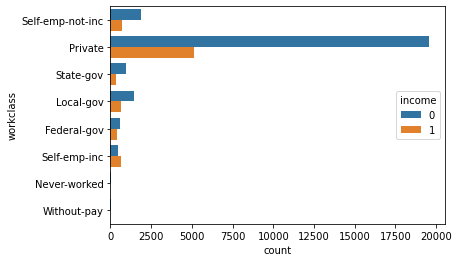

In [45]:
sns.countplot(y = df['workclass'], hue = df['income'])

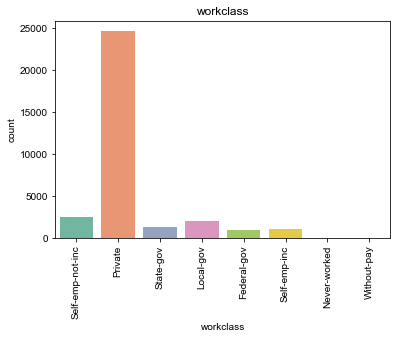

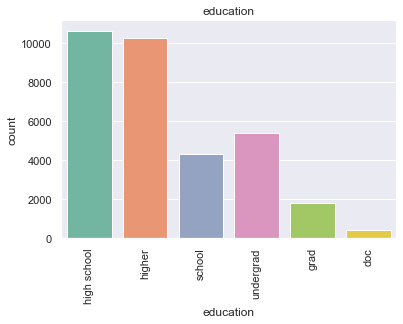

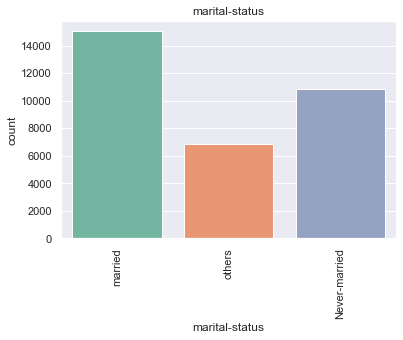

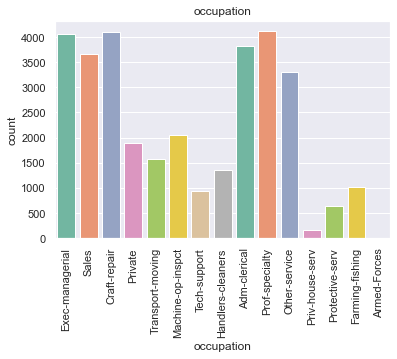

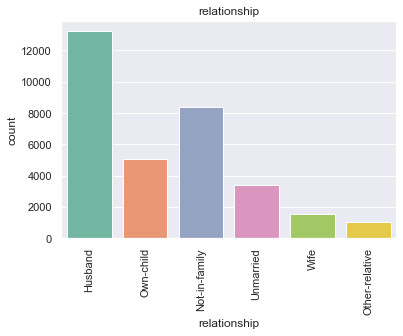

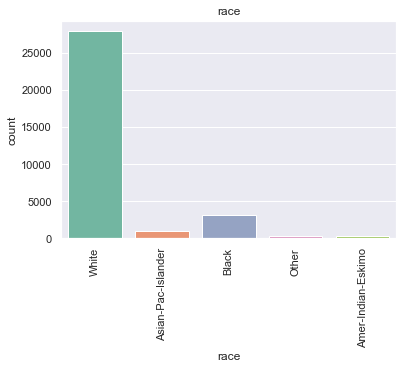

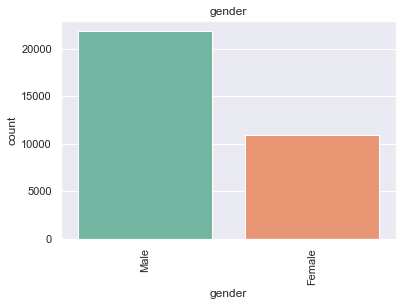

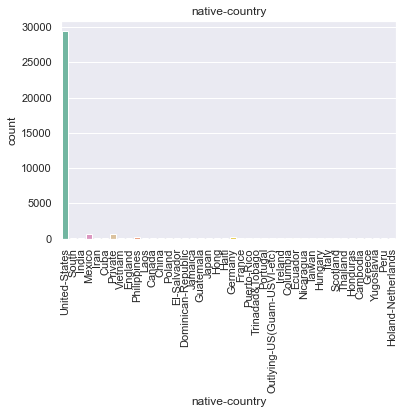

In [46]:
#categorical variables graphs
for i in cat_var:
    plt.title(i)
    sns.countplot(x=df[i],palette ='Set2')
    sns.set_theme(style='darkgrid')
    
    plt.xticks(rotation = 90)
    plt.show()

In [47]:
df['workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

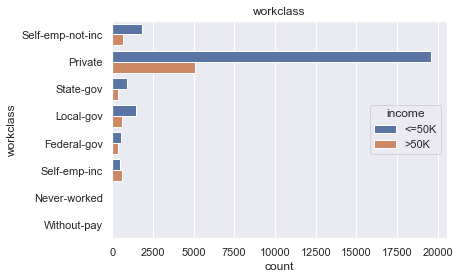

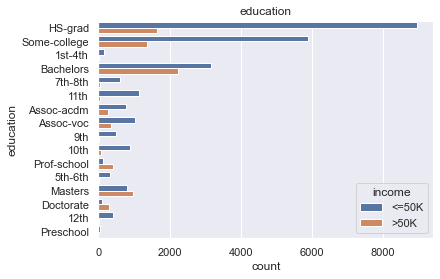

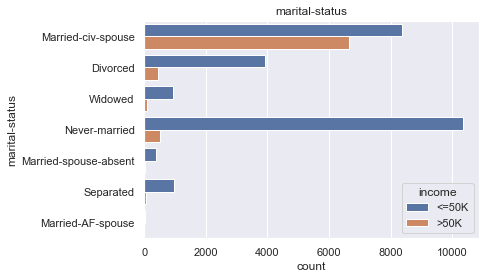

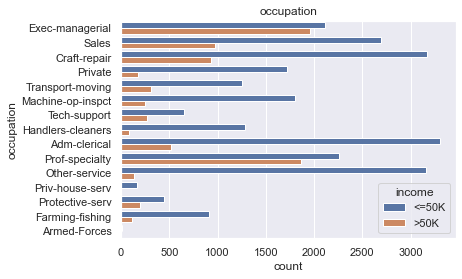

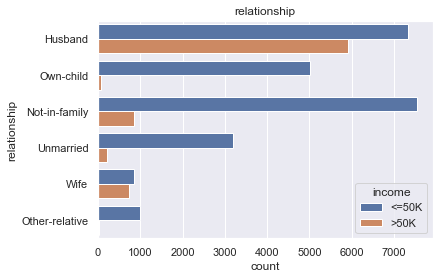

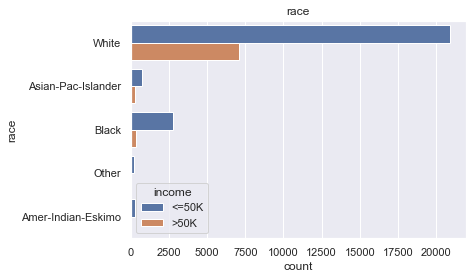

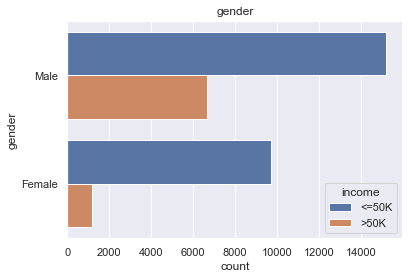

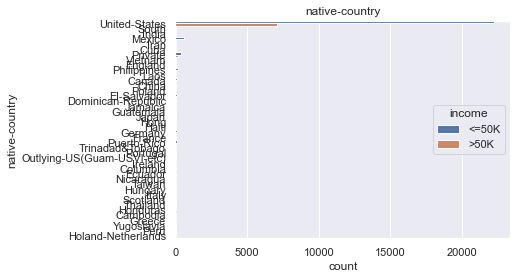

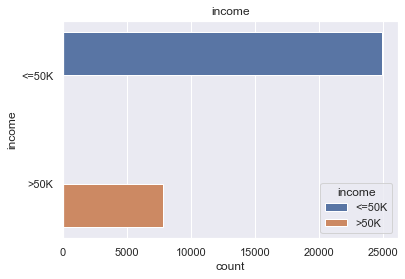

In [81]:
for i in cat_var:
    plt.title(i)
    sns.countplot(y=df[i],hue = df['income'])
    plt.show()

for workclass

- private sector is highest in both getting high and low income


for education

- HS-grad and some college are not getting high income and bachelors education has high income

for marital status 

- Married-civ-spouse are high incomes and never married are low compared to others

for occupation

- executive managers are getting high income and professors


Adm-clerical,craft_repair and other service are getting low income compared to others

for relationship

- husbands are generating higher income and at the same time they are having less income 

- not in family are generating low income

for race 

- white having both low and high income

for sex 
   
  - male are having higher income

for native colony

- people from usa generating variables

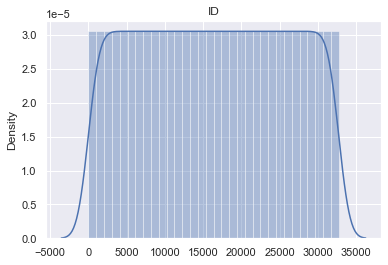

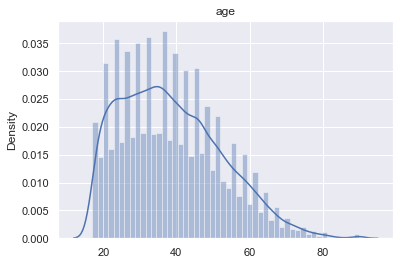

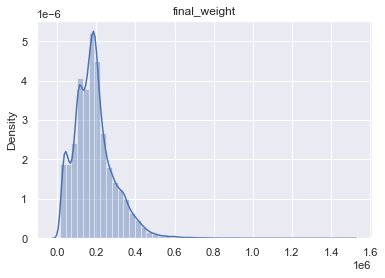

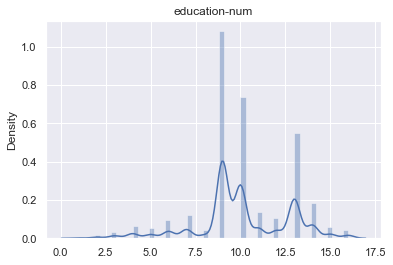

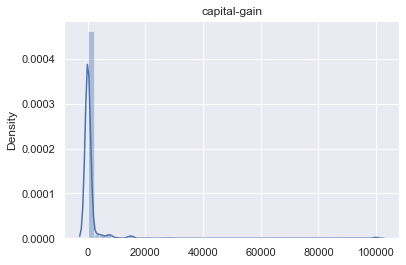

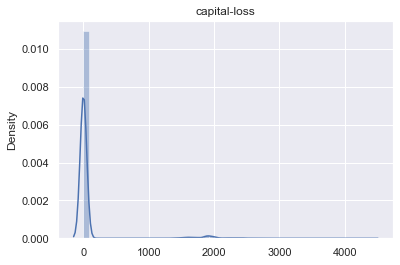

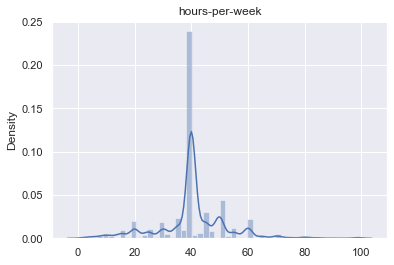

In [83]:
#visualizing the numerical variables
for i in num_var:
    plt.title(i)
    sns.distplot(x=df[i],kde = True)
    plt.show()

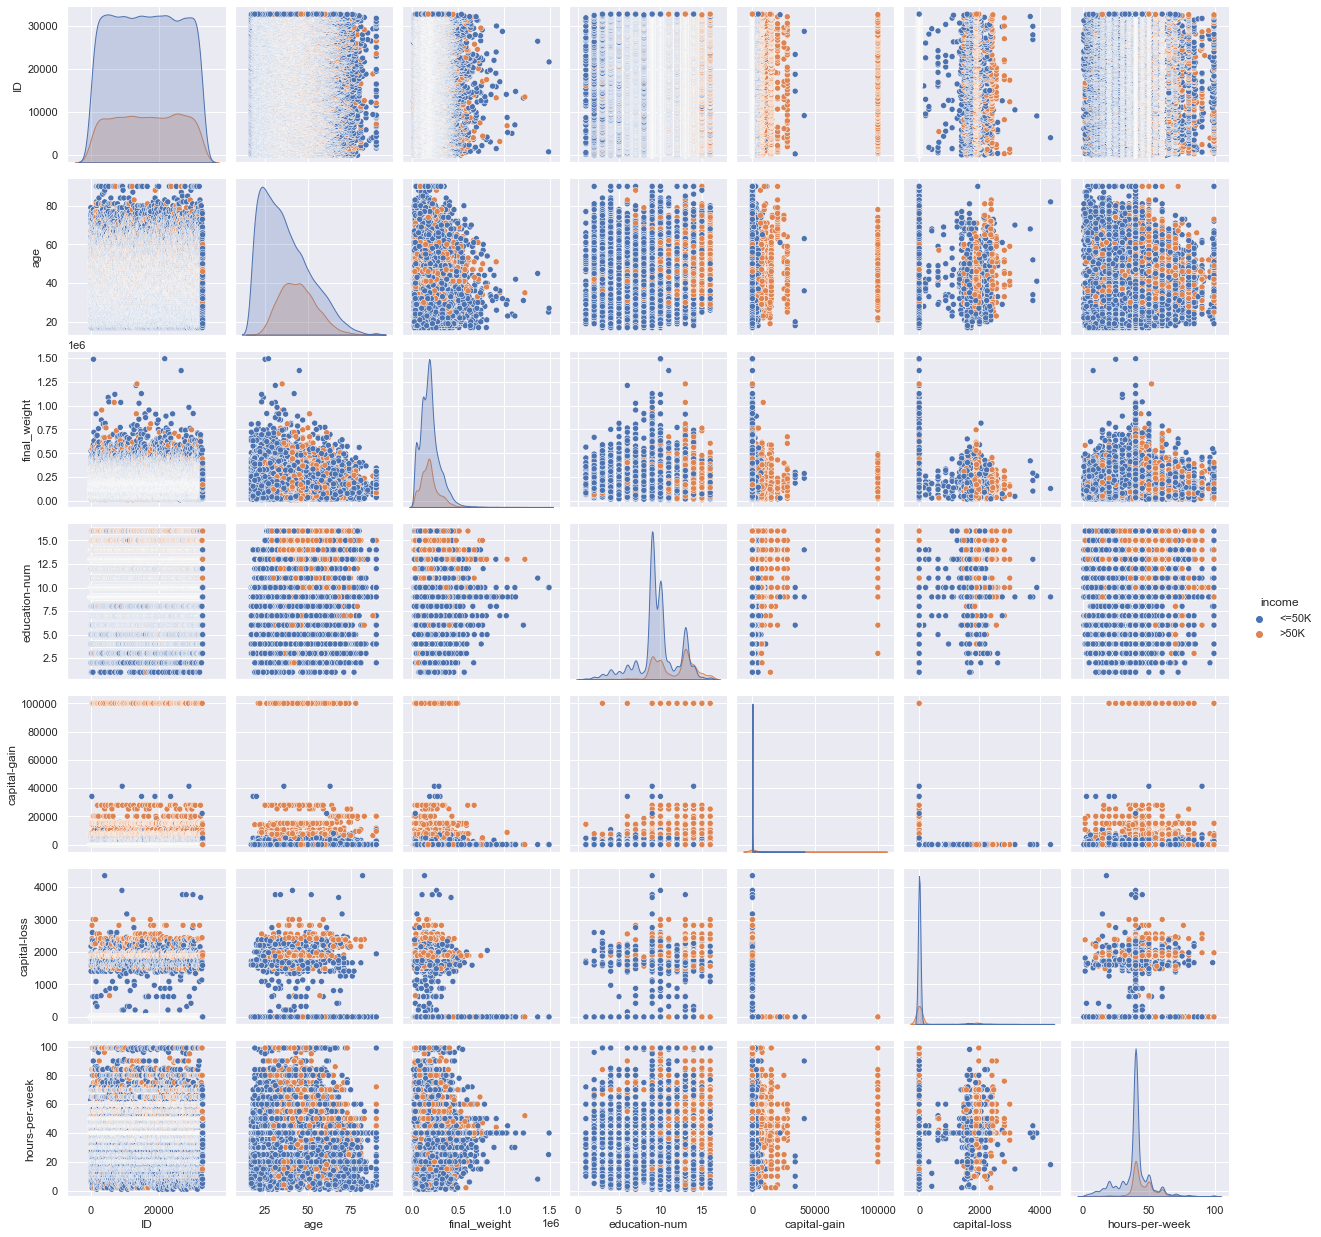

In [84]:
sns.pairplot(df,hue = 'income')

#### Model Building

In [120]:
X = df.drop(['income'],axis = 1)
y = df['income']

#### Feature scaling

In [121]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [122]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,ID,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,43,5,15498,2,8,1,3,0,4,1,0,0,47,39,0
1,1,11,5,5881,3,9,1,12,3,1,1,0,0,62,35,0
2,2,54,5,6344,4,1,2,2,1,4,0,0,0,27,39,0
3,3,58,3,819,2,8,2,9,1,4,0,0,0,7,39,0
4,4,33,3,6186,5,12,1,2,0,4,1,0,49,49,39,1


In [126]:
ss = StandardScaler().fit(df1.drop('income',axis =1))

In [129]:
X = ss.transform(df1.drop('income',axis =1))
y = df['income']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size = 0.3,random_state=40)

#### Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

print("Accuracy of training Data: {:,.4f} ".format(lr.score(X_train,y_train)))
print("Accuracy of test Data: {:,.4f}".format(lr.score(X_train,y_train)))

Accuracy of training Data: 0.8245 
Accuracy of test Data: 0.8245


#### Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()

model1 = rfc.fit(X_train,y_train)
pred1 = model1.predict(X_test)

print("Accuracy of training Data: {:,.4f} ".format(rfc.score(X_train,y_train)))
print("Accuracy of test Data: {:,.4f}".format(rfc.score(X_train,y_train)))


Accuracy of training Data: 1.0000 
Accuracy of test Data: 1.0000


In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [147]:
print(confusion_matrix(y_test,pred1))

[[7012  516]
 [ 864 1426]]


In [148]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7528
           1       0.73      0.62      0.67      2290

    accuracy                           0.86      9818
   macro avg       0.81      0.78      0.79      9818
weighted avg       0.85      0.86      0.86      9818



In [150]:
#precision :tp/tp+fp
print('Precision =' , 7012/(7012+864))

Precision = 0.8902996444895886


In [153]:
#recall = tp/tp+fn

print('Recall=', 7012/(7012+516))

Recall= 0.9314558979808714


For Another class :1(>50k)

In [154]:
#precision :tp/tp+fp
print('Precision =' , 1426/(1426+506))

Precision = 0.7380952380952381


In [155]:
#recall = tp/tp+fn

print('Recall=', 1426/(1426+864))

Recall= 0.622707423580786


In [ ]:
dfcsv = df.to_csv(

In [56]:
df.to_excel('df.csv', sep='?')

In [57]:
df.to_excel(r'df.xlsx', index = False)